## Pokémon

Il dataset (https://www.kaggle.com/datasets/maca11/all-pokemon-dataset) riporta l'elenco di tutti i Pokémon delle prime 8 generazioni. 

Per ogni pokémon ci interesseranno i seguenti campi:
<ul>
    <li>Nome</li>
    <li>Tipo primario</li>
    <li>Tipo secondario</li>
    <li>HP</li>
    <li>ATT</li>
    <li>DEF</li>
    <li>SP ATT</li>
    <li>SP DEF</li>
    <li>SPE</li>
    <li>BST</li>
    <li>Generazione</li>
    <li>È l'ultima evoluzione?</li>
    <li>Tasso di cattura</li>
    <li>È leggendario?</li>
    <li>Efficacia dei tipi contro il pokémon</li>
    <li>Altezza</li>
    <li>Peso</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataset = pd.read_csv("dataset/Pokemon_dataset.csv").astype({"Generation" : int, "Final Evolution": int, "Legendary": int})
dataset

,Name,Type 1,Type 2,HP,Att,Def,Spa,Spd,Spe,BST,...,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,Grass,Poison,80,82,83,100,100,80,525,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Charmander,Fire,NaN,39,52,43,60,50,65,309,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Glastrier,Ice,NaN,100,145,130,65,110,30,580,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1028,Spectrier,Ghost,NaN,100,65,60,145,80,130,580,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1029,Calyrex,Psychic,Grass,100,80,80,80,80,80,500,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1030,Calyrex Ice Rider,Psychic,Ice,100,165,150,85,130,50,680,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In totale esistono 1032 pokémon (considerando forme diverse dello stesso pokémon come pokémon diversi).

Iniziamo dall'analizzare quanti pokémon sono stati introdotti in ogni generazione:

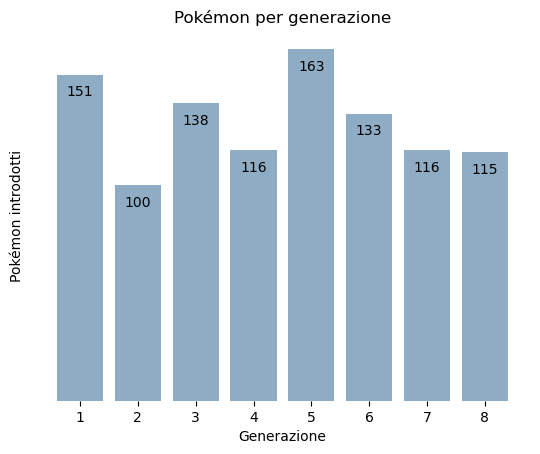

In [2]:
def pokemonByGenerationLabels(x,y):
    for i in x:
        plt.text(i, y[i] - 10, y[i], ha = 'center')

x_axis = dataset['Generation'].unique()
x_axis.sort()
y_axis = dataset.groupby(['Generation']).count()['Name']

plt.bar(x_axis, y_axis, color='#8eadc5')
plt.title("Pokémon per generazione")
plt.xlabel("Generazione")
plt.ylabel("Pokémon introdotti")
plt.yticks([])

plt.gca().set_frame_on(False)
pokemonByGenerationLabels(x_axis, y_axis)

plt.show()

Notiamo come nella prima e quinta generazione sono stati aggiunti molti pokemon, mentre in altre generazioni un pò meno. La generazione che ne ha introdotti di meno è stata la seconda.

Analizziamo, invece, quanti pokémon esistono per ogni tipo:

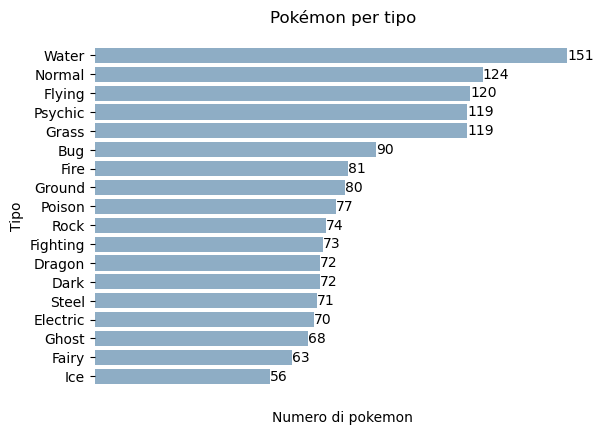

In [3]:
types = dataset['Type 1'].unique()

number_per_types = []
for t in types:
    number_per_types.append(len(dataset[(dataset['Type 1'] == t) | (dataset['Type 2'] == t)]))

type_series = pd.Series(index=types, data=number_per_types).sort_values(ascending=True)
x_axis = type_series.values
y_axis = type_series.index

bars = plt.barh(y_axis, x_axis, color='#8eadc5')
plt.title("Pokémon per tipo")
plt.ylabel("Tipo")
plt.xlabel("Numero di pokemon")
plt.xticks([])
plt.gca().set_frame_on(False)
plt.bar_label(bars)

plt.show()

Notiamo come i pokémon di tipo Acqua sono molti più degli altri, la distribuzione non è così omogenea, inoltre i pokemon del tipo prevalente sono quasi il triplo di quelli del tipo meno prevalente.

Identifichiamo due possibili suddivisioni dei pokemon in base al loro stadio evolutivo oppure all'essere leggendari o meno.

Vediamo quanti pokémon ricadono in ognuna delle categorie.

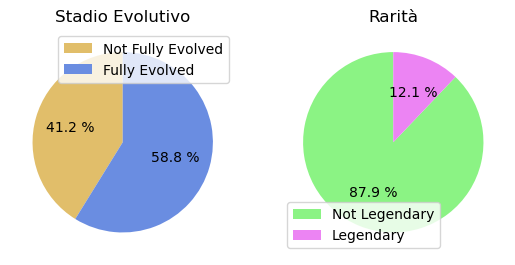

In [4]:
plt.subplot(1, 2, 1)

x_axis = ["Not Fully Evolved", "Fully Evolved"]
y_axis = dataset.groupby(['Final Evolution']).count()['Name']

plt.pie(y_axis, colors = ['#E1BE6A', '#6A8DE1'], autopct="%.1f %%", startangle=90)
plt.title("Stadio Evolutivo")
plt.legend(labels=x_axis)

plt.subplot(1, 2, 2)
x_axis = ["Not Legendary", "Legendary"]
y_axis = dataset.groupby(['Legendary']).count()['Name']

plt.pie(y_axis, colors = ['#8BF384', '#EC84F3'], autopct="%.1f %%", startangle=90)
plt.title("Rarità")
plt.legend(labels=x_axis)

plt.show()

Notiamo che ci sono più pokèmon allo stadio finale rispetto a quelli non completamente evoluti. D'altro canto sono molti di più i pokémon non leggendari rispetto ai leggendari. Questo ci fa pensare che i pokemon leggendari possano essere "rari".

Ipotizziamo che i leggendari siano più difficili da catturare rispetto ai non leggendari.

Verifichiamo.

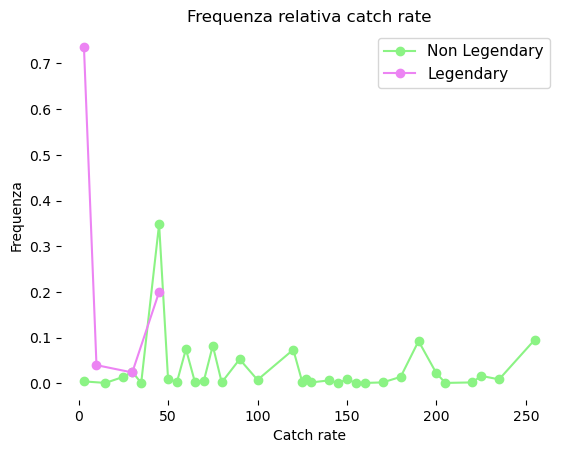

In [5]:
nonLegendaryCatchRate = dataset[dataset['Legendary'] == 0]['Catch Rate']
legendaryCatchRate = dataset[dataset['Legendary'] == 1]['Catch Rate']

x_nl = nonLegendaryCatchRate.unique();
x_nl.sort()
x_l = legendaryCatchRate.unique();
x_l.sort()

y_nl = []
y_l = []

for val in x_nl:
    y_nl.append(nonLegendaryCatchRate[nonLegendaryCatchRate == val].count() / nonLegendaryCatchRate.count())
    
for val in x_l:
    y_l.append(legendaryCatchRate[legendaryCatchRate == val].count() / legendaryCatchRate.count())

plt.plot(x_nl,y_nl, marker='o', label='Non Legendary', color='#8BF384')
plt.plot(x_l,y_l, marker='o', label='Legendary', color='#EC84F3')
plt.xlabel('Catch rate')
plt.ylabel('Frequenza')
plt.legend(fontsize=11)
plt.gca().set_frame_on(False)
plt.title('Frequenza relativa catch rate')

plt.show()

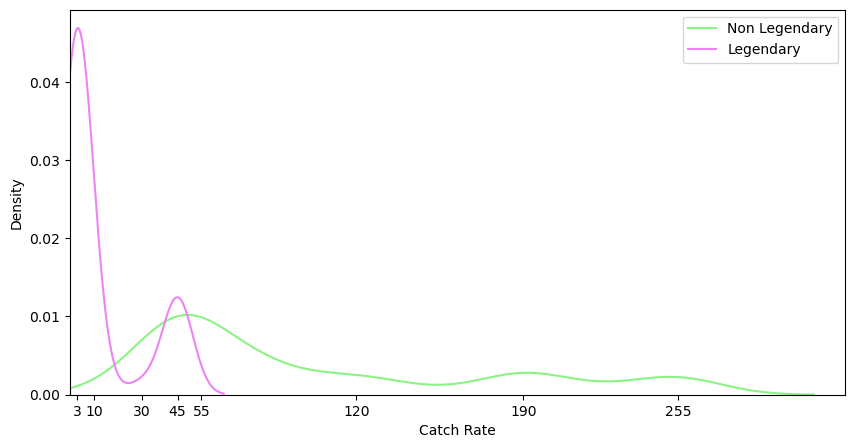

In [6]:
plt.subplots(figsize=(10, 5))

plt.xlim(0, 325)
sns.kdeplot(nonLegendaryCatchRate, color='#8BF384', label='Non Legendary')
sns.kdeplot(legendaryCatchRate, color='#EC84F3', label='Legendary')
plt.xticks([3, 10, 30, 45, 55, 120, 190, 255], ['3', '10', '30', '45', '55', '120', '190', '255'])
plt.legend()

plt.show()

Come si nota dai grafici (normalizzati), pokemon leggendari con basso catch rate sono molti di più di quelli non leggendari, viceversa ci sono più pokemon non leggendari con catch rate alto rispetto ai leggendari.

Vediamo le distribuzioni delle statistiche di base per ogni pokémon.

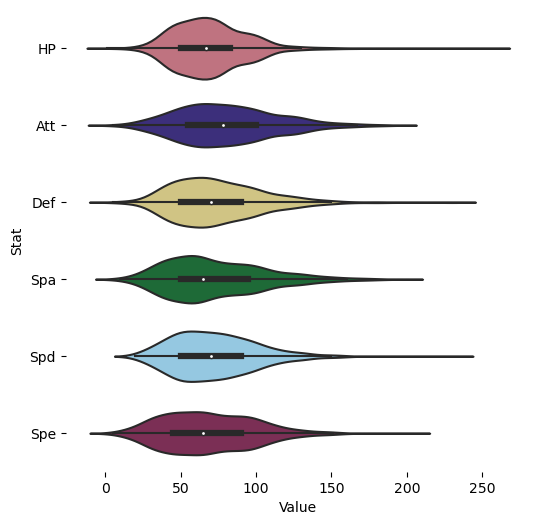

In [37]:
my_pal = {'HP': '#CC6677', 'Att': '#332288', 'Def': '#DDCC77', 'Spa': '#117733', 'Spd': '#88CCEE', 'Spe': '#882255'}

plt.figure(figsize=(6, 6))
sns.violinplot(data=dataset[["HP","Att","Def","Spa","Spd","Spe"]], orient ='h', palette=my_pal)
plt.ylabel('Stat')
plt.xlabel('Value')
plt.grid(False)
plt.gca().set_frame_on(False)

plt.show()

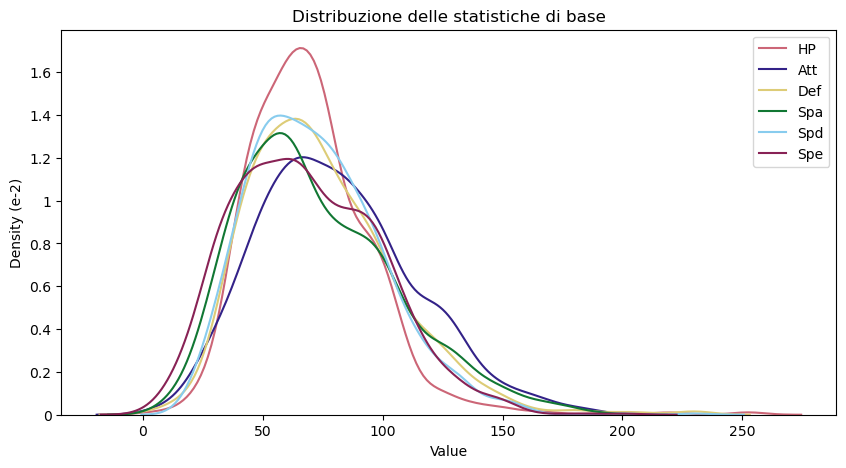

In [8]:
stats = ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']
values_by_stats = []

for i in stats:
    values_by_stats.append(dataset[i])

plt.subplots(figsize=(10, 5))
plt.title("Distribuzione delle statistiche di base")
sns.kdeplot(values_by_stats[0], color='#CC6677', label='HP')
sns.kdeplot(values_by_stats[1], color='#332288', label='Att')
sns.kdeplot(values_by_stats[2], color='#DDCC77', label='Def')
sns.kdeplot(values_by_stats[3], color='#117733', label='Spa')
sns.kdeplot(values_by_stats[4], color='#88CCEE', label='Spd')
sns.kdeplot(values_by_stats[5], color='#882255', label='Spe')
plt.yticks([0, 0.002, 0.004, 0.006, 0.008, 0.010, 0.012, 0.014, 0.016], ['0', '0.2', '0.4', '0.6', '0.8', '1', '1.2', '1.4', '1.6'])
plt.ylabel('Density (e-2)')
plt.xlabel('Value')
plt.legend()

plt.show()

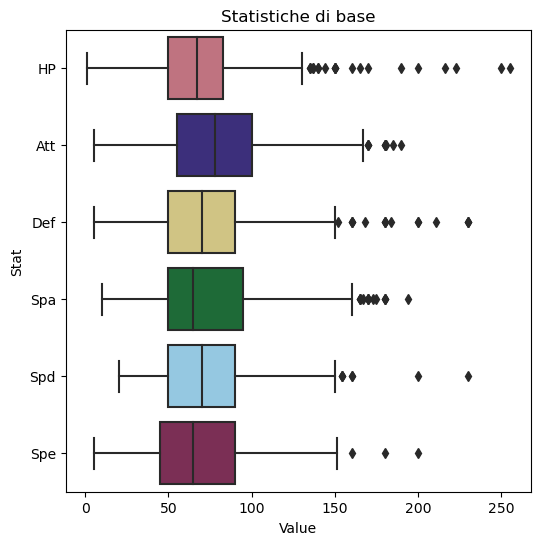

In [9]:
plt.figure(figsize=(6,6))
plt.title("Statistiche di base")

pokemon = dataset['Name'].count()

stats = []

for i in range(0, pokemon):
    stats += ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']
    
values = []

for p in dataset.iterrows():
    poke = p[1]
    values += [poke['HP'], poke['Att'], poke['Def'], poke['Spa'], poke['Spd'], poke['Spe']]

statsDf = pd.DataFrame({'Stat': stats, 'Value': values})

sns.boxplot(data=statsDf, x='Value', y='Stat', palette=my_pal)
plt.xlabel('Value')
plt.ylabel('Stat')

plt.show()

Possiamo notare che le distribuzioni delle varie statistiche sono benomale simili, la statistica d'attacco sembra quella generalmente più alta mentre quella di velocità la più bassa.
Inoltre notiamo che sono presenti molti outlier per ogni statistica, ciò potrebbe accadere perchè alcuni pokèmon sono molto più forti del pokemon medio.

Solitamente i videogiocatori si lamentano per il cosiddetto "powercreep", ovvero il continuo aumento della forza dei pokemon col passare del tempo, il quale rende i pokemon vecchi poco utilizzabili.

Cerchiamo di capire se è un problema reale andando ad osservare la distribuzione dei BST (Base Stats Total) a seconda delle varie generazioni. (Il BST è un buon indicatore di forza di un pokémon)

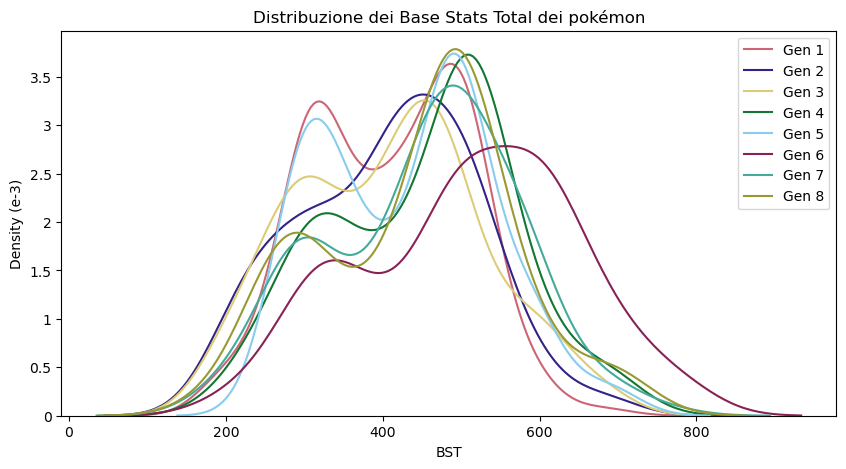

In [10]:
gens = range(1, 9)
bst_by_gen = []

grouped_by_gen = dataset.groupby('Generation')

for i in gens:
    bst_by_gen.append(grouped_by_gen.get_group(i)['BST'])

plt.subplots(figsize=(10, 5))
plt.title("Distribuzione dei Base Stats Total dei pokémon")
sns.kdeplot(bst_by_gen[0], color='#CC6677', label='Gen 1')
sns.kdeplot(bst_by_gen[1], color='#332288', label='Gen 2')
sns.kdeplot(bst_by_gen[2], color='#DDCC77', label='Gen 3')
sns.kdeplot(bst_by_gen[3], color='#117733', label='Gen 4')
sns.kdeplot(bst_by_gen[4], color='#88CCEE', label='Gen 5')
sns.kdeplot(bst_by_gen[5], color='#882255', label='Gen 6')
sns.kdeplot(bst_by_gen[6], color='#44AA99', label='Gen 7')
sns.kdeplot(bst_by_gen[7], color='#999933', label='Gen 8')
plt.yticks([0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035], ['0', '0.5', '1', '1.5', '2', '2.5', '3', '3.5'])
plt.ylabel('Density (e-3)')
plt.legend()

plt.show()

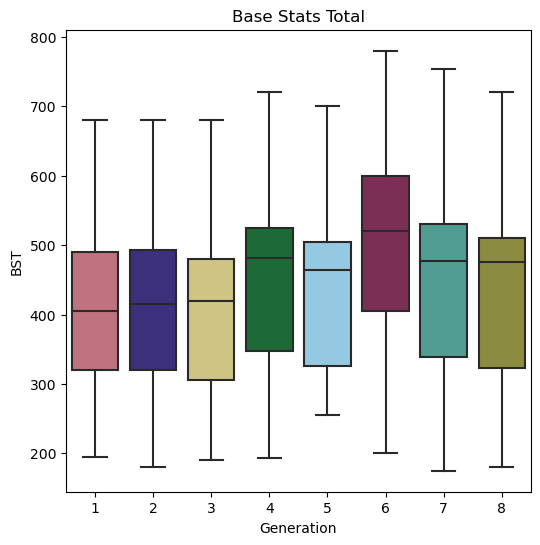

In [11]:
plt.figure(figsize=(6,6))
plt.title("Base Stats Total")

my_pal = {1: '#CC6677', 2: '#332288', 3: '#DDCC77', 4: '#117733', 5: '#88CCEE', 6: '#882255', 7: '#44AA99', 8: '#999933'}
sns.boxplot(data=dataset, y='BST', x='Generation', palette=my_pal)

plt.show()

Dai grafici riportati sopra notiamo che le distribuzioni delle BST attraverso le varie generazioni restano generalmente simili. L'unica generazione che salta all'occhio è la sesta. Possiamo però attribuire a questo aumento generale delle BST all'interno di questa generazione all'introduzione delle cosiddette "Mega Evoluzioni"

Ci aspettiamo che i pokémon allo stadio finale siano generalmente più forti dei pokémon che devono ancora evolversi, inoltre ci aspettiamo anche che i pokémon leggendari siano più forti di quelli regolari allo stadio finale.

Andiamo a verificare quest'ipotesi controllando le distribuzioni delle BST.

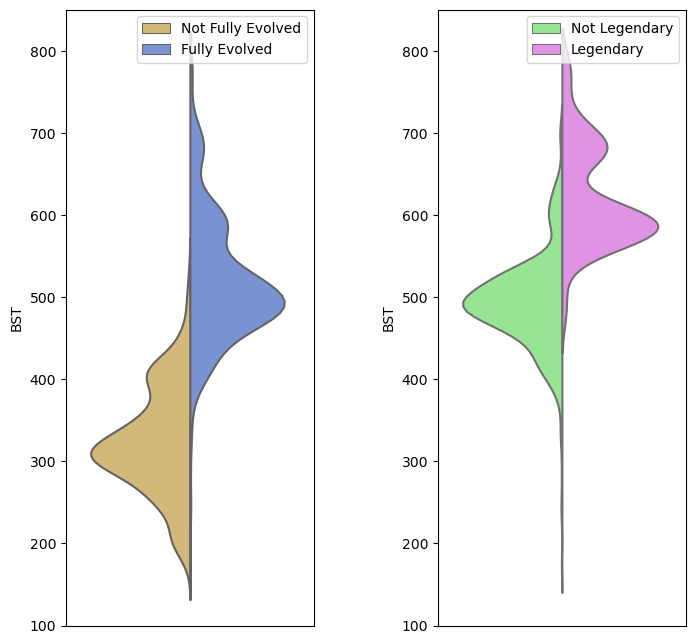

In [12]:
d = dataset[["BST", "Final Evolution", "Legendary"]].copy()
d["all"] = ""

my_pal1 = {0: '#E1BE6A', 1: '#6A8DE1'}
my_pal2 = {0: '#8BF384', 1: '#EC84F3'}

plt.subplots(figsize = (8, 8))

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace = 0.5)
ax = sns.violinplot(x='all', y='BST', hue='Final Evolution', data=d, split=True, inner=None, palette=my_pal1)
ax.legend(handles=ax.legend_.legendHandles, labels=['Not Fully Evolved', 'Fully Evolved'], loc='upper right')
plt.xlabel("")
plt.xticks([])
plt.ylim([100,850])

plt.subplot(1, 2, 2)
ax = sns.violinplot(x='all', y='BST', hue='Legendary', data=d[d['Final Evolution'] == 1], split=True, inner=None, palette=my_pal2)
ax.legend(handles=ax.legend_.legendHandles, labels=['Not Legendary', 'Legendary'])
plt.xlabel("")
plt.xticks([])
plt.ylim([100,850])

plt.show()

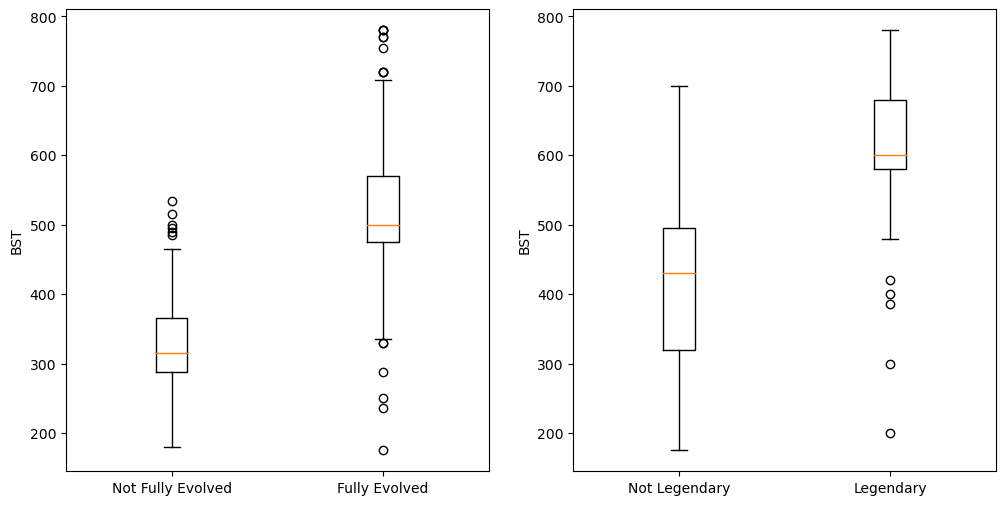

In [13]:
fullyEvolvedBST = d[d['Final Evolution'] == 1]["BST"]
notFullyEvolvedBST = d[d['Final Evolution'] == 0]["BST"]

legendary = d[d['Legendary'] == 1]
notLegendary = d[d['Legendary'] == 0]

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot([notFullyEvolvedBST, fullyEvolvedBST], labels=["Not Fully Evolved", "Fully Evolved"])
plt.grid(False)
plt.ylabel("BST")

plt.subplot(1,2,2)
plt.boxplot([notLegendary['BST'], legendary['BST']], labels=["Not Legendary", "Legendary"])
plt.grid(False)
plt.ylabel('BST')


plt.show()

Come si può notare, i pokemon allo stadio finale e i pokemon leggendari sono notevolmente più forti dei corrispettivi.

Vogliamo ora osservare il peso dei pokémon. Utilizziamo ancora una suddivisione per stadio evolutivo, in quanto ci aspettiamo che un pokèmon diventi più pesante quando si evolve.

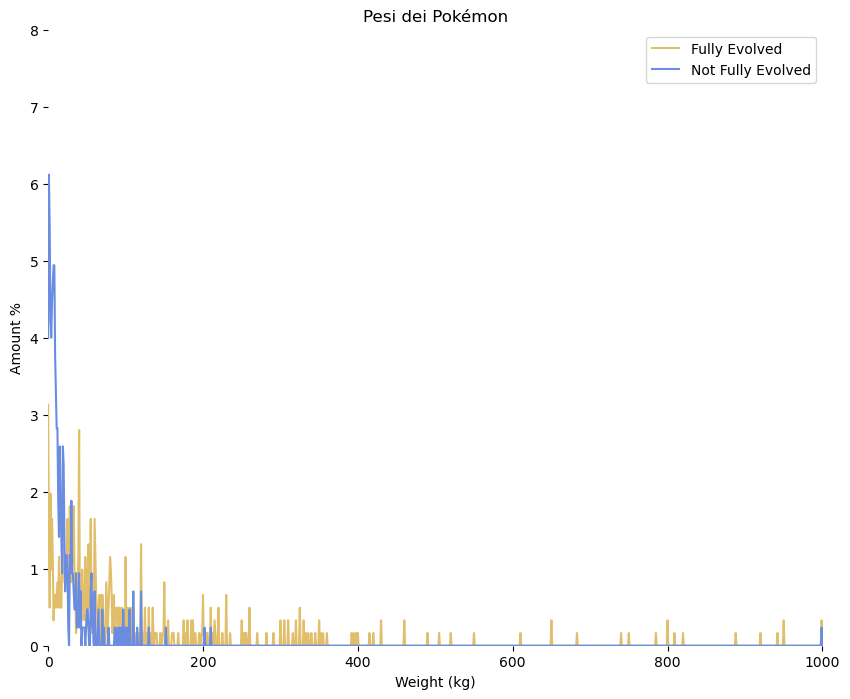

In [14]:
feWeights = dataset[dataset['Final Evolution'] == 1]['Weight']
nfeWeights = dataset[dataset['Final Evolution'] == 0]['Weight']

x = np.arange(0, 1001)

y1 = []
y2 = []

for i in x:
        y1.append(feWeights[(feWeights >= i) & (feWeights < i + 1)].count() / len(feWeights) * 100)
        y2.append(nfeWeights[(nfeWeights >= i) & (nfeWeights < i + 1)].count() / len(nfeWeights) * 100)
    
plt.figure(figsize=(10, 8))
plt.plot(x, y1, color='#E1BE6A', label='Fully Evolved')
plt.plot(x, y2, color='#6A8DE1', label='Not Fully Evolved')
plt.title('Pesi dei Pokémon')
plt.xlabel('Weight (kg)')
plt.ylabel('Amount %')
plt.ylim(0, 8)
plt.xlim(0, 1001)
plt.gca().set_frame_on(False)

plt.legend()

plt.show()

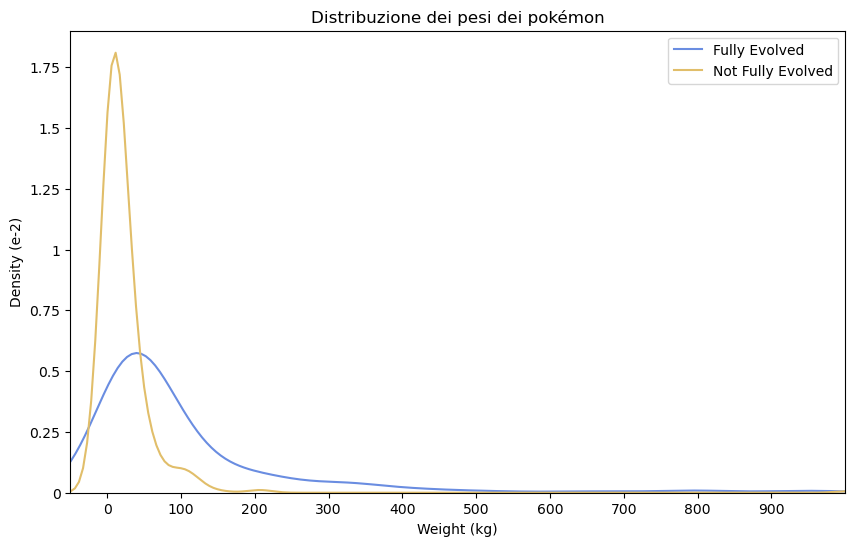

In [15]:
feWeights = dataset[dataset['Final Evolution'] == 1]['Weight']
nfeWeights = dataset[dataset['Final Evolution'] == 0]['Weight']

plt.subplots(figsize=(10, 6))

plt.title("Distribuzione dei pesi dei pokémon")
plt.xlim(-50, 1000)
sns.kdeplot(feWeights, color='#6A8DE1', label='Fully Evolved')
sns.kdeplot(nfeWeights, color='#E1BE6A', label='Not Fully Evolved')
plt.legend()
plt.xticks(range(0, 1000, 100))
plt.yticks([0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.0150, 0.0175], ['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5', '1.75'])
plt.ylabel('Density (e-2)')
plt.xlabel('Weight (kg)')

plt.show()

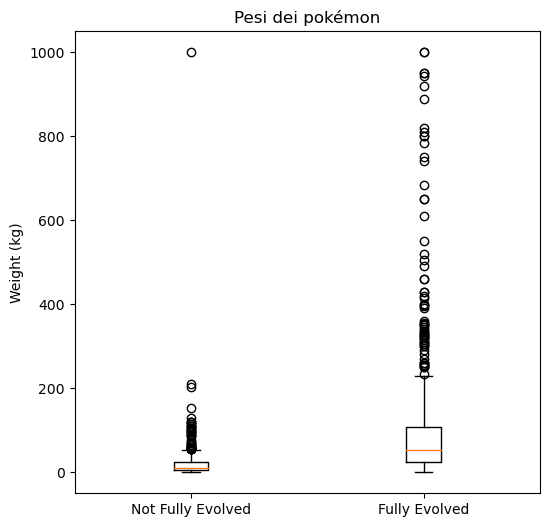

In [16]:
plt.figure(figsize=(6,6))
plt.boxplot([nfeWeights, feWeights], labels=["Not Fully Evolved", "Fully Evolved"])
plt.grid(False)

plt.ylabel("Weight (kg)")
plt.title('Pesi dei pokémon')

plt.show()

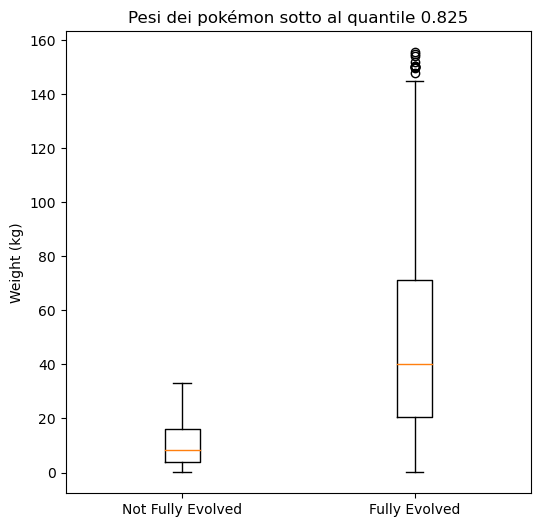

In [17]:
plt.figure(figsize=(6,6))
plt.boxplot([nfeWeights[nfeWeights < nfeWeights.quantile(q=0.825)], feWeights[feWeights < feWeights.quantile(q=0.825)]], labels=["Not Fully Evolved", "Fully Evolved"])
plt.grid(False)
plt.ylabel("Weight (kg)")
plt.title('Pesi dei pokémon sotto al quantile 0.825')

plt.show() 

Dai grafici possiamo notare come i pokémon allo stadio finale sono notevolmente più pesanti dei pokemon che si devono ancora evolvere.

Osserviamo poi le altezze dei pokémon. Ci aspettiamo che un pokèmon diventi anche più alto quando si evolve.

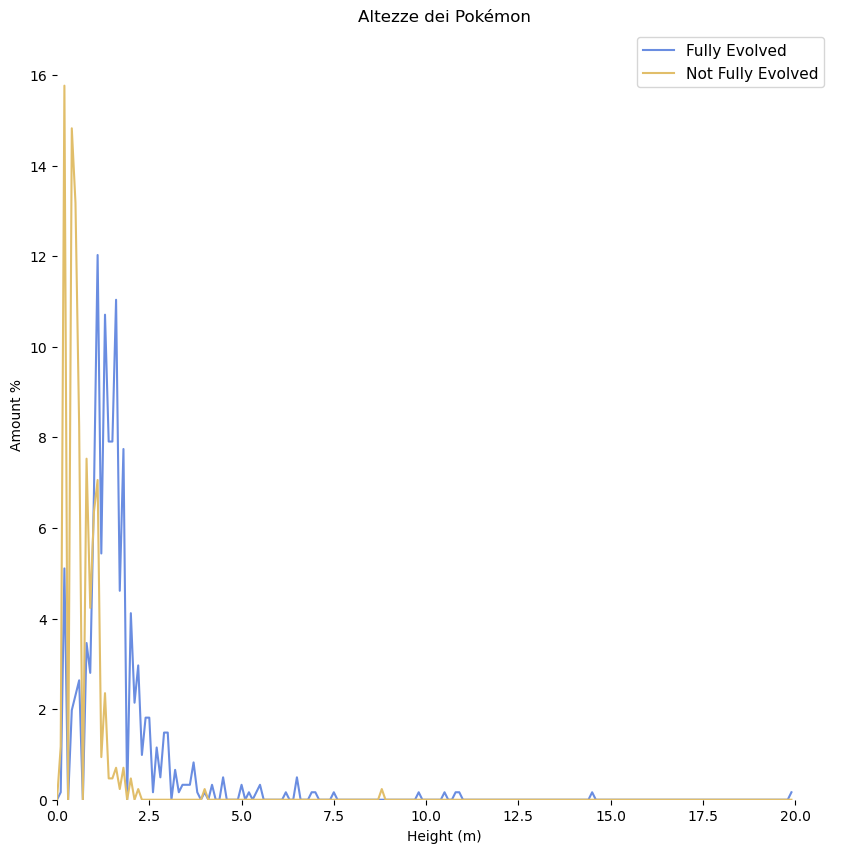

In [18]:
feHeights = dataset[dataset['Final Evolution'] == 1]['Height']
nfeHeights = dataset[dataset['Final Evolution'] == 0]['Height']

x = np.arange(0, 20, 0.1)

y1 = []
y2 = []

for i in x:    
        y1.append(feHeights[(feHeights >= i) & (feHeights < i + 0.1)].count() / len(feHeights) * 100)
        y2.append(nfeHeights[(nfeHeights >= i) & (nfeHeights < i + 0.1)].count() / len(nfeHeights) * 100)
    
plt.figure(figsize=(10,10))
plt.plot(x, y1,  color='#6A8DE1', label='Fully Evolved')
plt.plot(x, y2, color='#E1BE6A', label='Not Fully Evolved')
plt.legend(fontsize=11)
plt.title('Altezze dei Pokémon')
plt.xlabel('Height (m)')
plt.ylabel('Amount %')
plt.ylim(0, 17)
plt.xlim(0, 21)
plt.gca().set_frame_on(False)


plt.show()

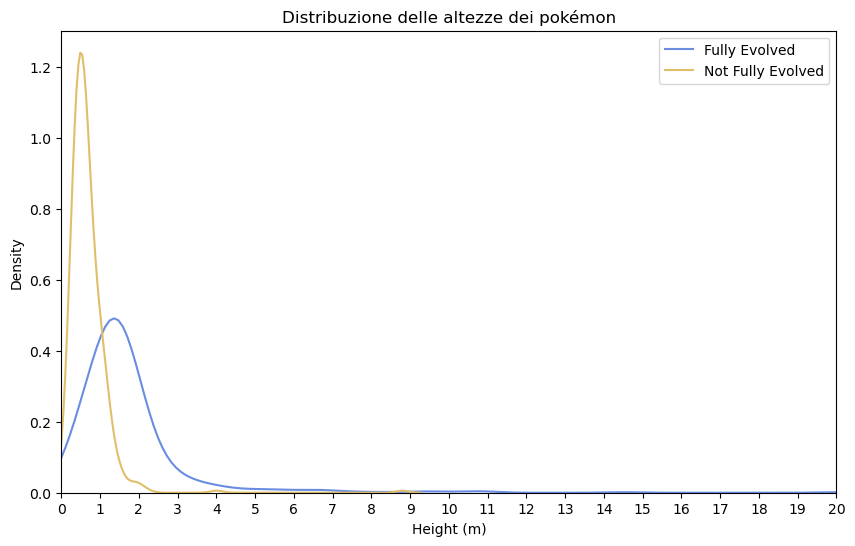

In [19]:
feHeights = dataset[dataset['Final Evolution'] == 1]['Height']
nfeHeights = dataset[dataset['Final Evolution'] == 0]['Height']

plt.subplots(figsize=(10, 6))

plt.title("Distribuzione delle altezze dei pokémon")
plt.xlim(0, 20)
sns.kdeplot(feHeights, color='#6A8DE1', label='Fully Evolved')
sns.kdeplot(nfeHeights, color='#E1BE6A', label='Not Fully Evolved')
plt.legend()
plt.xticks(range(0, 21))
plt.xlabel('Height (m)')

plt.show()

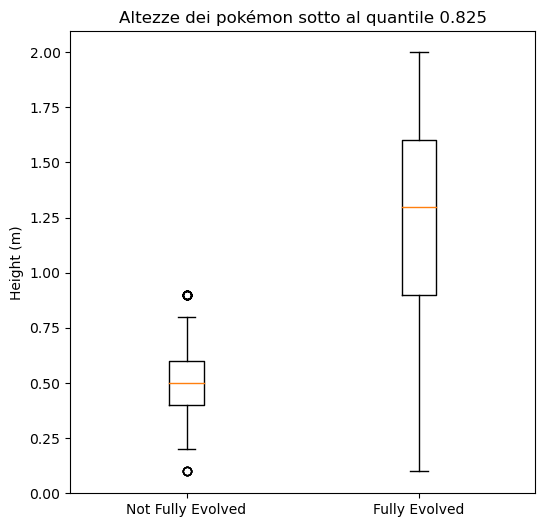

In [20]:
plt.figure(figsize=(6,6))
plt.boxplot([nfeHeights[nfeHeights < nfeHeights.quantile(q=0.825)], feHeights[feHeights < feHeights.quantile(q=0.825)]], labels=["Not Fully Evolved", "Fully Evolved"])
plt.grid(False)
plt.ylabel('Height (m)')
plt.yticks(pd.Series(range(0, 9)) * 0.25)
plt.title('Altezze dei pokémon sotto al quantile 0.825')

plt.show() 

Notiamo ancora una volta la grossa differenza tra pokémon allo stadio finale e non. I pokèmon completamente evoluti sono molto più alti generalmente dei pokémon che possono ancora evolvere

Nella realtà esiste generalmente una relazione diretta tra la dimensione degli organismi ed il loro peso. Per capire se questa relazione vale anche nel mondo dei pokèmon, proviamo ad osservare lo scatter plot delle due misurazioni.

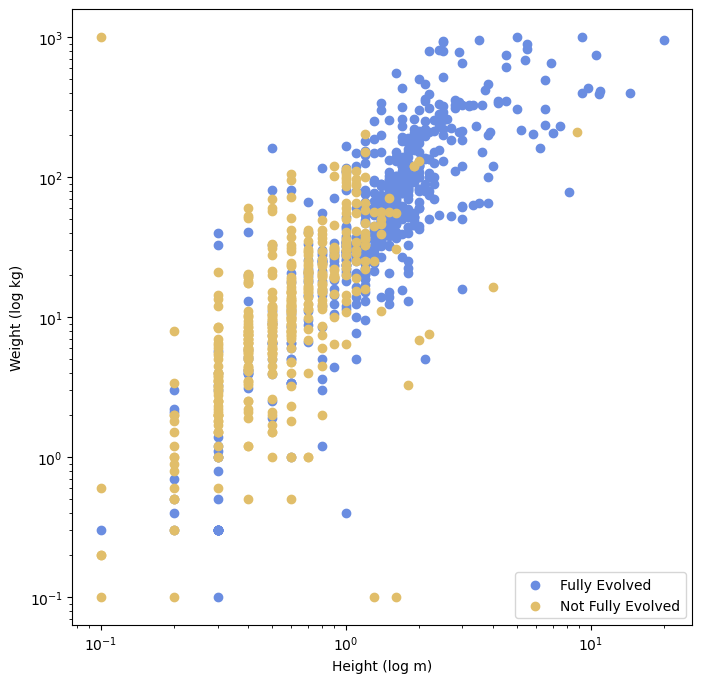

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(feHeights, feWeights, color='#6A8DE1', label='Fully Evolved')
plt.scatter(nfeHeights, nfeWeights, color='#E1BE6A', label='Not Fully Evolved')
plt.legend()
plt.xlabel('Height (log m)')
plt.ylabel('Weight (log kg)')
plt.yscale('log')
plt.xscale('log')

plt.show()

Notiamo che si osserva una chiara relazione diretta tra peso ed altezza dei pokèmon, quindi generalmente ci aspettiamo che un pokémon alto sia anche pesante e viceversa, se un pokémon è basso ci aspettiamo che sia anche leggero.

Inoltre possiamo notare nuovamente quanto chiaramente si distinguano le distribuzioni dei pokémon allo stadio finale e quelli non completamente evoluti.

Un altro elemento fondamentale nelle battaglie pokèmon è il "tipo". Ogni tipo ha delle debolezze, resistenze ed immunità ad altri tipi. Ogni pokemon può avere uno o due tipi distinti.

Avere tante resistenze significa essere un buon difensore, mentre avere tante debolezze rende molto fragili nei confronti degli attaccanti. L'immunità è molto desiderabile in quanto evita proprio di ricevere danni, allo stesso modo la super resistenza permette di ricevere danni molto ridotti. Il punto dolente è la super debolezza, in quanto un pokèmon super debole ad un certo tipo ricevere danni ingenti da un attaccante che utilizza una mossa di quel tipo.

Andiamo ora ad analizzare come sono distribuite resistenze e debolezze nei vari pokèmon.

In [22]:
def amountMultiplier(x, mul):
    k = 0
    if (x['Against Normal'] == mul):
        k += 1
    if (x['Against Fire'] == mul):
        k += 1
    if (x['Against Water'] == mul):
        k += 1
    if (x['Against Electric'] == mul):
        k += 1
    if (x['Against Grass'] == mul):
        k += 1
    if (x['Against Ice'] == mul):
        k += 1
    if (x['Against Fighting'] == mul):
        k += 1
    if (x['Against Poison'] == mul):
        k += 1
    if (x['Against Ground'] == mul):
        k += 1
    if (x['Against Flying'] == mul):
        k += 1
    if (x['Against Psychic'] == mul):
        k += 1
    if (x['Against Bug'] == mul):
        k += 1
    if (x['Against Rock'] == mul):
        k += 1
    if (x['Against Ghost'] == mul):
        k += 1
    if (x['Against Dragon'] == mul):
        k += 1
    if (x['Against Dark'] == mul):
        k += 1
    if (x['Against Steel'] == mul):
        k += 1
    if (x['Against Fairy'] == mul):
        k += 1
    return k

def generateValues(mul):
    values = []
    for i in counter:
        c = 0
        for index, row in dataset.iterrows():
            if (amountMultiplier(row, mul) == i):
                c += 1
        values.append(c/len(dataset))
    return values

counter = range(0,18)
immunities = generateValues(0)
superWeak = generateValues(0.25)
weak = generateValues(0.5)
neutral = generateValues(1)
superEffective = generateValues(2)
ultraEffective = generateValues(4)

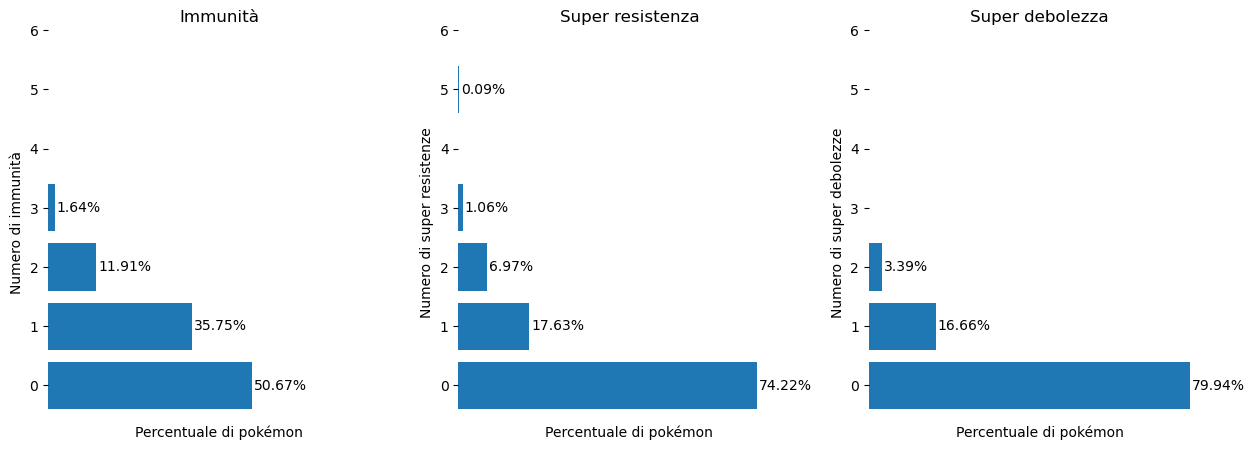

In [23]:
def ceil(x):
    return int(x*100)/100

def addlabels3(x,y):
    for i in x:
        if (ceil(y[i] * 100)> 0):
            plt.text(i, y[i] + 0.02, str(ceil(y[i] * 100)) + '%', ha = 'center')
            
def addLabels4(values):
    for i, v in enumerate(values):
        if (v > 0):
            plt.text(v + 0.005, i, str(ceil(v * 100)) + '%', va='center')
              

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
bars = plt.barh(counter, immunities)
plt.ylim(-0.5,6)
plt.xlim(0, 0.85)
plt.xlabel('Percentuale di pokémon')
plt.ylabel('Numero di immunità')
plt.title('Immunità')
plt.xticks([])
plt.yticks(range(0, 7))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(immunities)

plt.subplot(1,3,2)
bars = plt.barh(counter, superWeak)
plt.ylim(-0.5, 6)
plt.xlim(0,0.85)
plt.xlabel('Percentuale di pokémon')
plt.ylabel('Numero di super resistenze')
plt.title('Super resistenza')
plt.xticks([])
plt.yticks(range(0, 7))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(superWeak)

plt.subplot(1,3,3)
bars = plt.barh(counter, ultraEffective)
plt.ylim(-0.5,6)
plt.xlim(0,0.85)
plt.xlabel('Percentuale di pokémon')
plt.ylabel('Numero di super debolezze')
plt.title('Super debolezza')
plt.xticks([])
plt.yticks(range(0, 7))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(ultraEffective)

plt.show()

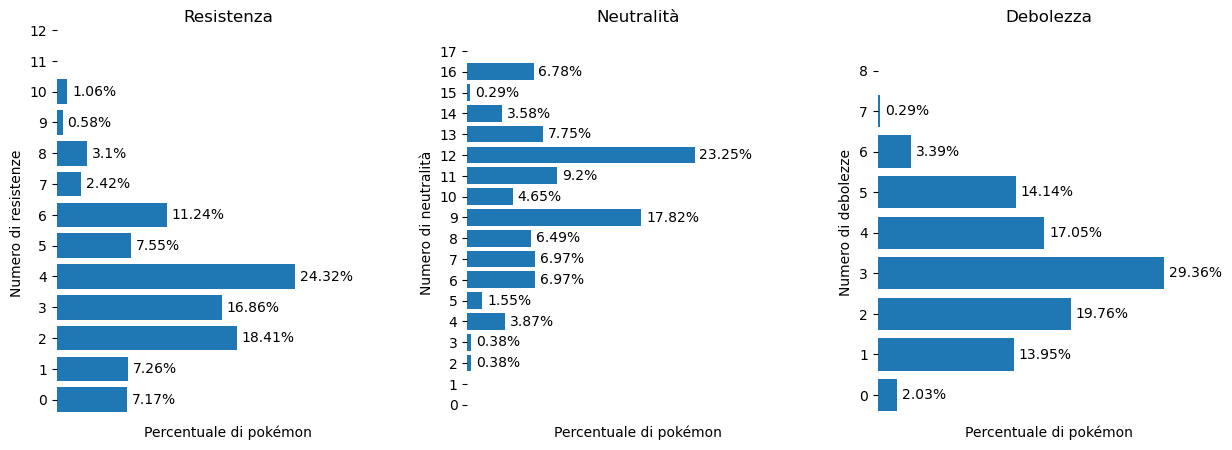

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
bars = plt.barh(counter, weak)
plt.ylim(-0.5,12)
plt.xlim(0, 0.35)
plt.xlabel('Percentuale di pokémon')
plt.ylabel('Numero di resistenze')
plt.title('Resistenza')
plt.xticks([])
plt.yticks(range(0, 13))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(weak)

plt.subplot(1,3,2)
bars = plt.barh(counter, neutral)
plt.ylim(-0.5,18)
plt.xlim(0, 0.35)
plt.ylabel('Numero di neutralità')
plt.xlabel('Percentuale di pokémon')
plt.title('Neutralità')
plt.xticks([])
plt.yticks(range(0, 18))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(neutral)

plt.subplot(1,3,3)
bars = plt.barh(counter, superEffective)
plt.ylim(-0.5,9)
plt.xlim(0, 0.35)
plt.ylabel('Numero di debolezze')
plt.xlabel('Percentuale di pokémon')
plt.title('Debolezza')
plt.xticks([])
plt.yticks(range(0, 9))
plt.gca().set_frame_on(False)
plt.grid(False)
addLabels4(superEffective)

plt.show()